In [13]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;}
</style>
""");

In [14]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
plt.rcParams['figure.figsize'] = (12, 9)

['train.csv', 'gender_submission.csv', 'test.csv']


In [15]:
# Load and preview datasets 
train_dataset, test_dataset = pd.read_csv('../input/train.csv'), pd.read_csv('../input/test.csv')
print('Training Dataset: %s, Testing Dataset: %s' %(str(train_dataset.shape), str(test_dataset.shape)))
train_dataset.head()
train_dataset.dtypes.reset_index()

Training Dataset: (891, 12), Testing Dataset: (418, 11)


,index,0
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


# Exploratory Data Analysis

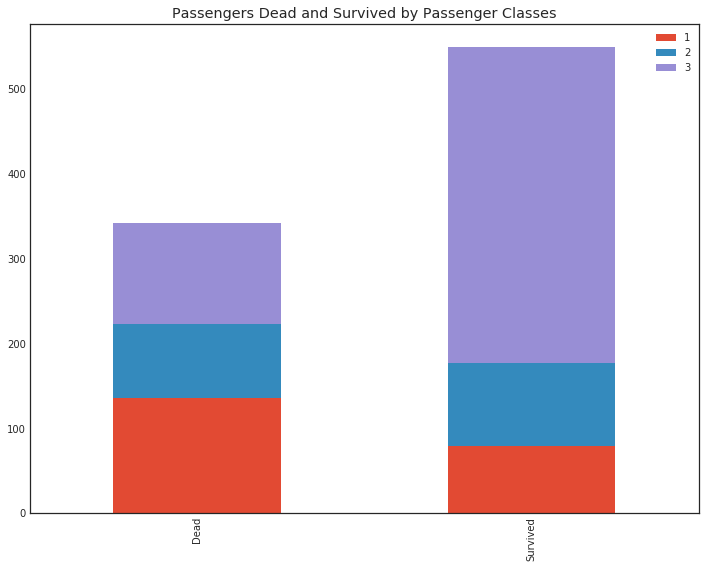

In [16]:
survivors = train_dataset[train_dataset['Survived'] == 1]['Pclass'].value_counts()
dead = train_dataset[train_dataset['Survived'] == 0]['Pclass'].value_counts()

df_survival_pclass = pd.DataFrame([survivors, dead])
df_survival_pclass.index = ['Dead', 'Survived']
df_survival_pclass.plot(kind='bar', stacked=True, title='Passengers Dead and Survived by Passenger Classes');

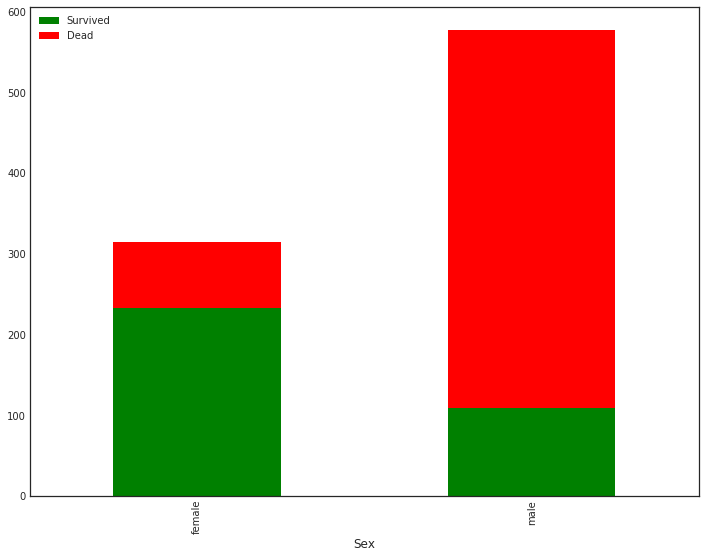

In [17]:
train_dataset['Dead'] = 1 - train_dataset['Survived']
train_dataset.groupby('Sex').agg('sum')[['Survived', 'Dead']].plot(kind='bar', stacked=True, colors=['g', 'r']);

In [18]:
def null_check(train_dataset, test_dataset):
    print("Training Dataset:")
    print(train_dataset.isnull().sum())
    
    print("\nTesting Dataset:")
    print(test_dataset.isnull().sum())

null_check(train_dataset, test_dataset)

Training Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Dead             0
dtype: int64

Testing Dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Data Wrangling, Feature Selection

In [19]:
# Replace NaN values in the column 'Age' with the median value 
train_dataset['Age'] = train_dataset['Age'].fillna(train_dataset['Age'].median())
test_dataset['Age'] = test_dataset['Age'].fillna(test_dataset['Age'].median())
# training["Age"].fillna(training["Age"].median(), inplace = True)
# testing["Age"].fillna(testing["Age"].median(), inplace = True) 

# Apply same concept as above
train_dataset["Embarked"].fillna("S", inplace = True)
train_dataset["Fare"].fillna(train_dataset["Fare"].median(), inplace = True)
test_dataset["Fare"].fillna(test_dataset["Fare"].median(), inplace = True)

# Drop columns 'Cabin' and 'Ticket' since they contain a lot of noise
train_dataset.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
test_dataset.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_check(train_dataset, test_dataset)

Training Dataset:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Dead           0
dtype: int64

Testing Dataset:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


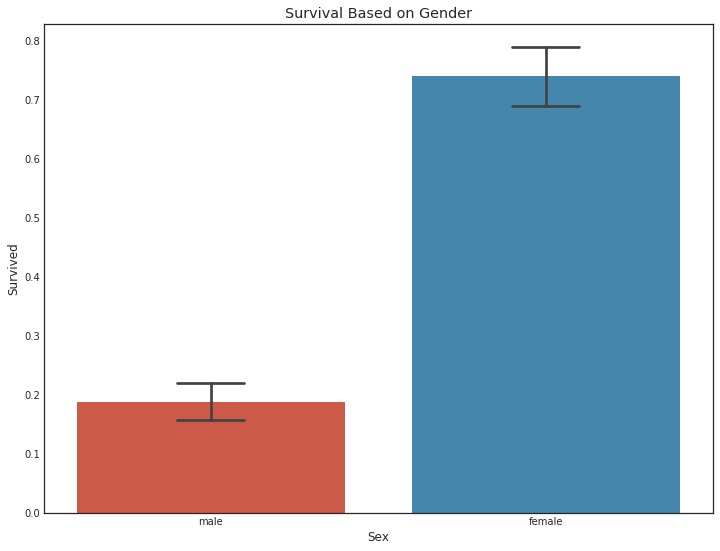

In [20]:
sns.barplot(x='Sex', y='Survived', data=train_dataset, capsize=.2)
plt.title('Survival Based on Gender')
plt.show()